In [1]:
def prepare():  
  from google.colab import drive
  drive.mount("/content/drive/")
  import os 
  os.chdir("drive/My Drive/essay/model")

%matplotlib inline
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten, ThresholdedReLU, maximum, concatenate
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, LocallyConnected1D, LSTM
from keras import backend as K
from keras import regularizers
from keras.models import load_model
from keras import optimizers
from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection



Using TensorFlow backend.


In [0]:
def train_save(name):
  labels =np.load(name+"nonTATAlabels.npy")
  padded_comb_data=np.load(name+"nonTATA.npy")
  motif_len = 21
  motif_num = 200
  X_train, X_test,y_train, y_test = model_selection.train_test_split(padded_comb_data, labels, test_size=0.2)
  input_shape = X_train.shape[1:]
  print(input_shape)
  num_classes = 2
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  model = Sequential()
  model.add(Conv1D(motif_num, kernel_size=motif_len, input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(ThresholdedReLU(theta=0.0))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=4, padding='valid')) #改
  model.add(BatchNormalization())
  model.add(Dense(4, activation='relu', use_bias=True))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))
  model.add(Flatten())
  model.add(Dense(num_classes,activation='sigmoid',use_bias=True))
  model.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                metrics=['accuracy'])

  batch_size = 128
  epochs= 20
  history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                            validation_data=(X_test, y_test))
  model.save(name+"_TATA_model_v1.h5")
  return model, history

In [0]:
def plot_history():  
  plt.plot(history.history['acc'])
  #plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()
def show_train_history(train_acc,test_acc,history):
    plt.plot(history.history[train_acc])
    plt.plot(history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
def predict(name,species,model):
  nonTATA=np.load("T"+species+".npy")
  pred=model.predict_classes(nonTATA)
  np.save("pred_"+name+"_TATA",pred)

In [2]:
prepare()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
def main(name,species):
  model,history=train_save(name)
  show_train_history('acc','val_acc',history)
  show_train_history('loss','val_loss',history)
  predict(name,species,model)



(290, 4)
Train on 121132 samples, validate on 30283 samples
Epoch 1/20
121132/121132 [==============================] - 335s 3ms/step - loss: 0.6957 - acc: 0.6616 - val_loss: 0.5738 - val_acc: 0.7304
Epoch 2/20
121132/121132 [==============================] - 332s 3ms/step - loss: 0.6055 - acc: 0.7182 - val_loss: 0.5569 - val_acc: 0.7438
Epoch 3/20
121132/121132 [==============================] - 332s 3ms/step - loss: 0.5766 - acc: 0.7362 - val_loss: 0.5445 - val_acc: 0.7491
Epoch 4/20
121132/121132 [==============================] - 333s 3ms/step - loss: 0.5601 - acc: 0.7460 - val_loss: 0.5358 - val_acc: 0.7534
Epoch 5/20
121132/121132 [==============================] - 330s 3ms/step - loss: 0.5462 - acc: 0.7510 - val_loss: 0.5282 - val_acc: 0.7565
Epoch 6/20
121132/121132 [==============================] - 332s 3ms/step - loss: 0.5369 - acc: 0.7534 - val_loss: 0.5219 - val_acc: 0.7594
Epoch 7/20
121132/121132 [==============================] - 332s 3ms/step - loss: 0.5300 - acc: 0.75

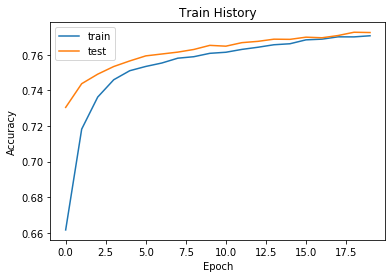

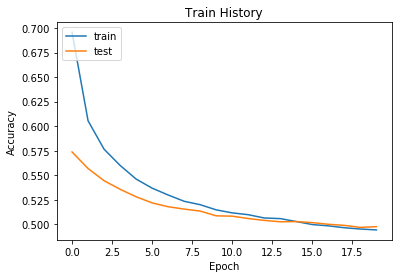

In [0]:
main(name="135",species="1")

In [3]:
model = tf.contrib.keras.models.load_model('135_nonTATA_model_v1.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
nonTATA=np.load("padded_m_ortho.npy")

In [6]:
pred=model.predict_classes(nonTATA)

ValueError: ignored

In [0]:
np.save("pred_2_nonTATA",pred)

In [3]:
model = tf.contrib.keras.models.load_model('135_nonTATA_model_v1.h5')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
!pip3 install numpy==1.16.2